In [951]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from IPython.core.display import display
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, roc_curve

/var/folders/7c/1pxkjrdj2zj43h3n_hws75xh0000gn/T/ipykernel_2010/2825199157.py:14: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


# Load Dataset

In [952]:
df_depth = pd.read_csv('ActonLakeDepth.csv')
df_depth.head()

,Site,Date,Depth,DissolvedOxygen,Light,Temperature
0,Acton Lake,1992-06-03,0.0,16.8,1710.00,18.2
1,Acton Lake,1992-06-03,0.5,NaN,670.00,NaN
2,Acton Lake,1992-06-03,1.0,16.2,214.30,18.0
3,Acton Lake,1992-06-03,2.0,12.5,31.34,17.5
4,Acton Lake,1992-06-03,3.0,7.2,6.07,16.1


In [953]:
df_integrated = pd.read_csv('ActonLakeIntegrated.csv')
df_integrated.head()

,Site,Date,Secchi,LarvalFishDensity,IntegratedSamplingDepth,Chlorophyll_a,SuspendedSolids,NonvolatileSuspendedSolids,ParticulateC,ParticulateN,ParticulateP,TotalNitrogen,TotalPhosphorus,ZooplanktonDepth,TotalZooplankton
0,Acton Lake,1992-06-03,0.78,NaN,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,NaN
1,Acton Lake,1992-06-10,0.80,NaN,NaN,37.01,NaN,NaN,3361.0,591.0,47.81,NaN,NaN,NaN,NaN
2,Acton Lake,1992-06-17,0.85,NaN,NaN,33.07,NaN,NaN,3431.0,585.0,47.13,NaN,NaN,NaN,NaN
3,Acton Lake,1992-06-26,0.85,NaN,NaN,55.52,NaN,NaN,3470.0,616.0,46.71,NaN,NaN,NaN,NaN
4,Acton Lake,1992-07-01,0.75,NaN,NaN,53.17,NaN,NaN,3581.0,647.0,48.43,NaN,NaN,NaN,NaN


In [954]:
# merge two datasets
merged_df = pd.merge(df_depth, df_integrated, on='Date', how='inner')
merged_df.head()
df = merged_df.copy()
df.head()

,Site_x,Date,Depth,DissolvedOxygen,Light,Temperature,Site_y,Secchi,LarvalFishDensity,IntegratedSamplingDepth,Chlorophyll_a,SuspendedSolids,NonvolatileSuspendedSolids,ParticulateC,ParticulateN,ParticulateP,TotalNitrogen,TotalPhosphorus,ZooplanktonDepth,TotalZooplankton
0,Acton Lake,1992-06-03,0.0,16.8,1710.00,18.2,Acton Lake,0.78,NaN,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,NaN
1,Acton Lake,1992-06-03,0.5,NaN,670.00,NaN,Acton Lake,0.78,NaN,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,NaN
2,Acton Lake,1992-06-03,1.0,16.2,214.30,18.0,Acton Lake,0.78,NaN,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,NaN
3,Acton Lake,1992-06-03,2.0,12.5,31.34,17.5,Acton Lake,0.78,NaN,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,NaN
4,Acton Lake,1992-06-03,3.0,7.2,6.07,16.1,Acton Lake,0.78,NaN,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,NaN


In [955]:
# Extract the year from the 'Date' column in the 'df' DataFrame
#df['year'] = pd.to_datetime(df['Date']).dt.year

# Display the resulting DataFrame
#display(df)


In [956]:
print(merged_df.dtypes) #check data types 

Site_x                         object
Date                           object
Depth                         float64
DissolvedOxygen               float64
Light                         float64
Temperature                   float64
Site_y                         object
Secchi                        float64
LarvalFishDensity             float64
IntegratedSamplingDepth       float64
Chlorophyll_a                 float64
SuspendedSolids               float64
NonvolatileSuspendedSolids    float64
ParticulateC                  float64
ParticulateN                  float64
ParticulateP                  float64
TotalNitrogen                 float64
TotalPhosphorus               float64
ZooplanktonDepth              float64
TotalZooplankton              float64
dtype: object


In [957]:
# count of null values for DissolvedOxygen in each year
df['Date'] = pd.to_datetime(df['Date'])
nan_counts = df.groupby(df['Date'].dt.year)['DissolvedOxygen'].apply(lambda x: x.isna().sum())
nan_counts
#

Date
1992     9
1993     0
1994     0
1995     0
1996     3
1997     8
1998     0
1999     9
2000     1
2001     6
2002    20
2003    14
2004     0
2005    14
2006     0
2007     0
2008     8
2009     4
2010    14
2011    12
2012     9
2013     0
2014     1
2015    40
2016     2
Name: DissolvedOxygen, dtype: int64

since missing value for DissolvedOxygen is not a lot for each year, we will not narrow down the year.

In [958]:
# checking for null values 
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Site_x,0,0.000000
Date,0,0.000000
Depth,0,0.000000
DissolvedOxygen,174,2.182639
Light,680,8.529854
Temperature,109,1.367285
Site_y,0,0.000000
Secchi,140,1.756147
LarvalFishDensity,2831,35.511791
IntegratedSamplingDepth,6560,82.288008


In [959]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'date' column and create a new column called 'year'
df['year'] = df['Date'].dt.year

# Group the data by the 'year' column and calculate the mean for each column
mean_by_year = df.groupby('year').mean().reset_index()

# Display the resulting DataFrame
print(mean_by_year)
display(mean_by_year)

    year     Depth  DissolvedOxygen       Light  Temperature    Secchi  \
0   1992  3.581633         5.618768  173.667852    19.117391  0.792857   
1   1993  3.650000         6.453381   61.101415    18.840952  0.758095   
2   1994  3.608696         6.160906  107.359432    19.717029  0.709783   
3   1995  3.650000         7.012238  161.981000    18.691429  0.577619   
4   1996  3.650000         5.284346  195.010583    18.311250  0.722083   
5   1997  3.627962         7.943350  257.680287    19.502010  0.625355   
6   1998  3.620805         5.222148  127.003758    22.127517  0.180000   
7   1999  3.200000         6.003382  142.752759    23.128676  0.469310   
8   2000  2.963878         7.159160  180.443785    21.626820  0.526996   
9   2001  3.398699         7.811391  165.027475    17.242833  0.692323   
10  2002  3.419023         6.165312  136.662168    19.273953  0.494139   
11  2003  3.450746         7.756262  126.186879    18.593731  0.567522   
12  2004  3.462857         5.339943  1

,year,Depth,DissolvedOxygen,Light,Temperature,Secchi,LarvalFishDensity,IntegratedSamplingDepth,Chlorophyll_a,SuspendedSolids,NonvolatileSuspendedSolids,ParticulateC,ParticulateN,ParticulateP,TotalNitrogen,TotalPhosphorus,ZooplanktonDepth,TotalZooplankton
0,1992,3.581633,5.618768,173.667852,19.117391,0.792857,NaN,NaN,47.325512,NaN,NaN,3606.153285,612.854015,49.515401,NaN,NaN,NaN,NaN
1,1993,3.650000,6.453381,61.101415,18.840952,0.758095,NaN,NaN,39.478571,NaN,NaN,3308.619048,429.190476,56.233333,NaN,105.818571,NaN,NaN
2,1994,3.608696,6.160906,107.359432,19.717029,0.709783,NaN,NaN,39.691154,14.772381,6.943000,3975.560000,688.320000,81.654615,3319.276400,83.354800,NaN,32.742679
3,1995,3.650000,7.012238,161.981000,18.691429,0.577619,NaN,NaN,45.374444,17.936842,8.277500,4549.894737,731.421053,85.060875,6709.010000,95.298571,NaN,164.781818
4,1996,3.650000,5.284346,195.010583,18.311250,0.722083,0.000000,NaN,20.898750,19.683810,12.698500,2236.300000,309.550000,43.710476,6778.419091,99.344583,NaN,42.560000
5,1997,3.627962,7.943350,257.680287,19.502010,0.625355,2.719205,NaN,43.965848,17.638882,6.038571,4565.368421,712.619883,72.707662,NaN,113.656199,NaN,561.940464
6,1998,3.620805,5.222148,127.003758,22.127517,0.180000,0.000000,NaN,52.089664,17.304532,6.403309,NaN,NaN,NaN,5475.270134,126.820671,NaN,1.882500
7,1999,3.200000,6.003382,142.752759,23.128676,0.469310,NaN,NaN,48.948529,13.213562,2.188356,4625.250000,753.838235,72.404412,2374.762294,111.130169,NaN,NaN
8,2000,2.963878,7.159160,180.443785,21.626820,0.526996,2.224000,NaN,65.768707,12.085675,3.388934,3621.317073,599.115854,62.525708,7142.126209,103.869419,NaN,NaN
9,2001,3.398699,7.811391,165.027475,17.242833,0.692323,3.782398,NaN,47.831673,13.809627,4.381314,3233.071713,502.638645,69.356995,5699.414267,101.383922,NaN,24.947618


In [960]:
df_filled = mean_by_year.fillna(mean_by_year.mean())
df_filled = df_filled
display(df_filled)

,year,Depth,DissolvedOxygen,Light,Temperature,Secchi,LarvalFishDensity,IntegratedSamplingDepth,Chlorophyll_a,SuspendedSolids,NonvolatileSuspendedSolids,ParticulateC,ParticulateN,ParticulateP,TotalNitrogen,TotalPhosphorus,ZooplanktonDepth,TotalZooplankton
0,1992,3.581633,5.618768,173.667852,19.117391,0.792857,5.955526,2.260246,47.325512,14.274829,5.526556,3606.153285,612.854015,49.515401,4336.888778,99.163260,7.251690,83.939589
1,1993,3.650000,6.453381,61.101415,18.840952,0.758095,5.955526,2.260246,39.478571,14.274829,5.526556,3308.619048,429.190476,56.233333,4336.888778,105.818571,7.251690,83.939589
2,1994,3.608696,6.160906,107.359432,19.717029,0.709783,5.955526,2.260246,39.691154,14.772381,6.943000,3975.560000,688.320000,81.654615,3319.276400,83.354800,7.251690,32.742679
3,1995,3.650000,7.012238,161.981000,18.691429,0.577619,5.955526,2.260246,45.374444,17.936842,8.277500,4549.894737,731.421053,85.060875,6709.010000,95.298571,7.251690,164.781818
4,1996,3.650000,5.284346,195.010583,18.311250,0.722083,0.000000,2.260246,20.898750,19.683810,12.698500,2236.300000,309.550000,43.710476,6778.419091,99.344583,7.251690,42.560000
5,1997,3.627962,7.943350,257.680287,19.502010,0.625355,2.719205,2.260246,43.965848,17.638882,6.038571,4565.368421,712.619883,72.707662,4336.888778,113.656199,7.251690,561.940464
6,1998,3.620805,5.222148,127.003758,22.127517,0.180000,0.000000,2.260246,52.089664,17.304532,6.403309,3642.087867,612.945923,72.085195,5475.270134,126.820671,7.251690,1.882500
7,1999,3.200000,6.003382,142.752759,23.128676,0.469310,5.955526,2.260246,48.948529,13.213562,2.188356,4625.250000,753.838235,72.404412,2374.762294,111.130169,7.251690,83.939589
8,2000,2.963878,7.159160,180.443785,21.626820,0.526996,2.224000,2.260246,65.768707,12.085675,3.388934,3621.317073,599.115854,62.525708,7142.126209,103.869419,7.251690,83.939589
9,2001,3.398699,7.811391,165.027475,17.242833,0.692323,3.782398,2.260246,47.831673,13.809627,4.381314,3233.071713,502.638645,69.356995,5699.414267,101.383922,7.251690,24.947618


In [961]:
df['Date'] = pd.to_datetime(df['Date'])
#new_date = (df['Date'] >= '1992-01-01') & (df['Date'] <= '2014-12-31')
df = df.drop(columns=['Site_x',  'Site_y', 'Date'])
#df = df.loc[new_date]
df = df.reset_index(drop=True)
df

,Depth,DissolvedOxygen,Light,Temperature,Secchi,LarvalFishDensity,IntegratedSamplingDepth,Chlorophyll_a,SuspendedSolids,NonvolatileSuspendedSolids,ParticulateC,ParticulateN,ParticulateP,TotalNitrogen,TotalPhosphorus,ZooplanktonDepth,TotalZooplankton,year
0,0.0,16.80,1710.00,18.2,0.78,NaN,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,NaN,1992
1,0.5,NaN,670.00,NaN,0.78,NaN,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,NaN,1992
2,1.0,16.20,214.30,18.0,0.78,NaN,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,NaN,1992
3,2.0,12.50,31.34,17.5,0.78,NaN,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,NaN,1992
4,3.0,7.20,6.07,16.1,0.78,NaN,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,NaN,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7967,4.5,5.67,0.07,18.9,0.75,NaN,2.25,33.70,11.17,6.94,NaN,NaN,NaN,1620.55,NaN,7.0,NaN,2016
7968,5.0,5.40,NaN,18.8,0.75,NaN,2.25,33.70,11.17,6.94,NaN,NaN,NaN,1620.55,NaN,7.0,NaN,2016
7969,6.0,4.62,NaN,18.7,0.75,NaN,2.25,33.70,11.17,6.94,NaN,NaN,NaN,1620.55,NaN,7.0,NaN,2016
7970,7.0,3.87,NaN,18.6,0.75,NaN,2.25,33.70,11.17,6.94,NaN,NaN,NaN,1620.55,NaN,7.0,NaN,2016


In [962]:
# Count the number of missing values in the DissolvedOxygen column
missing_dissolved_oxygen = df['DissolvedOxygen'].isnull().sum()
print("Number of missing values in the DissolvedOxygen column:", missing_dissolved_oxygen)


Number of missing values in the DissolvedOxygen column: 174


In [963]:
# Remove rows with missing values in the DissolvedOxygen column
df = df.dropna(subset=['DissolvedOxygen'])
missing_dissolved_oxygen = df['DissolvedOxygen'].isnull().sum()
print("Number of missing values in the DissolvedOxygen column:", missing_dissolved_oxygen)


Number of missing values in the DissolvedOxygen column: 0


In [964]:
df.describe()

,Depth,DissolvedOxygen,Light,Temperature,Secchi,LarvalFishDensity,IntegratedSamplingDepth,Chlorophyll_a,SuspendedSolids,NonvolatileSuspendedSolids,ParticulateC,ParticulateN,ParticulateP,TotalNitrogen,TotalPhosphorus,ZooplanktonDepth,TotalZooplankton,year
count,7798.000000,7798.000000,7120.000000,7791.000000,7658.000000,5038.000000,1369.000000,7449.000000,6942.000000,6837.000000,5432.000000,5432.000000,5743.000000,6300.000000,6422.000000,1357.000000,5228.000000,7798.000000
mean,3.372724,6.485832,141.710035,20.097040,0.629924,6.961640,2.268809,56.960264,13.609787,5.095050,3586.555044,608.884702,73.182009,4201.474195,96.619105,7.255711,71.369548,2005.144652
std,2.337853,5.002655,365.447088,5.002411,0.170868,18.405194,0.583069,26.574240,10.817310,9.566281,1285.802088,232.606166,23.505300,2597.341227,45.040073,0.446857,169.770741,6.592957
min,0.000000,0.000000,0.000000,2.000000,0.010000,0.000000,0.750000,1.350000,4.520000,0.030000,846.000000,105.000000,10.380000,437.260000,15.260000,6.000000,0.851900,1992.000000
25%,1.500000,1.300000,0.130000,16.280000,0.530000,0.000000,1.750000,37.980000,10.110000,2.060000,2724.000000,450.000000,57.300000,1657.430000,72.970000,7.000000,17.430000,2001.000000
50%,3.000000,6.300000,3.210000,20.400000,0.600000,0.110000,2.250000,54.670000,11.950000,3.590000,3431.000000,585.000000,70.900000,3936.890000,88.630000,7.000000,34.890000,2005.000000
75%,5.000000,10.290000,62.147500,24.300000,0.750000,2.670000,2.750000,72.950000,14.620000,5.690000,4262.000000,756.000000,83.900000,6325.450000,109.490000,7.500000,74.440000,2010.000000
max,8.000000,30.030000,3993.000000,31.100000,1.350000,130.640000,3.500000,204.130000,197.410000,168.910000,8230.000000,1295.000000,196.000000,11857.350000,527.660000,8.000000,2002.000000,2016.000000


/var/folders/7c/1pxkjrdj2zj43h3n_hws75xh0000gn/T/ipykernel_2010/1445011222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DissolvedOxygen'] = df['DissolvedOxygen'].apply(lambda x: float(x))


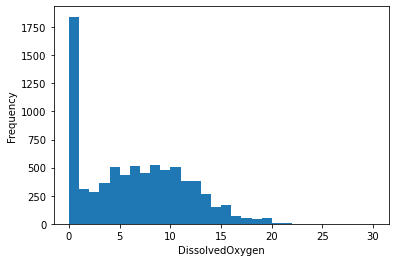

In [965]:
# distribution of DissolvedOxygen
df['DissolvedOxygen'] = df['DissolvedOxygen'].apply(lambda x: float(x))
plt.hist(df['DissolvedOxygen'], bins=30)
plt.xlabel('DissolvedOxygen')
plt.ylabel('Frequency')
plt.show()

In [966]:
# a dissolved oxygen (DO) concentration of 5 mg/L or above is generally considered an indicator of good water quality.

#We created a new column called DissolvedOxygen_dummy to indicate water quality based on DissolvedOxygen readings. 
#If the DissolvedOxygen reading is above 5, we assigned a value of 1 to indicate good water quality. 
#Otherwise, we assigned a value of 0.

df['DissolvedOxygen_dummy'] = df['DissolvedOxygen'].apply(lambda x: 1 if x >= 5 else 0)
value_counts = df['DissolvedOxygen_dummy'].value_counts()
print(value_counts)

1    4505
0    3293
Name: DissolvedOxygen_dummy, dtype: int64


/var/folders/7c/1pxkjrdj2zj43h3n_hws75xh0000gn/T/ipykernel_2010/3984464798.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DissolvedOxygen_dummy'] = df['DissolvedOxygen'].apply(lambda x: 1 if x >= 5 else 0)


In [967]:
df.head()

,Depth,DissolvedOxygen,Light,Temperature,Secchi,LarvalFishDensity,IntegratedSamplingDepth,Chlorophyll_a,SuspendedSolids,NonvolatileSuspendedSolids,ParticulateC,ParticulateN,ParticulateP,TotalNitrogen,TotalPhosphorus,ZooplanktonDepth,TotalZooplankton,year,DissolvedOxygen_dummy
0,0.0,16.8,1710.00,18.2,0.78,NaN,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,NaN,1992,1
2,1.0,16.2,214.30,18.0,0.78,NaN,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,NaN,1992,1
3,2.0,12.5,31.34,17.5,0.78,NaN,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,NaN,1992,1
4,3.0,7.2,6.07,16.1,0.78,NaN,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,NaN,1992,1
5,4.0,5.3,1.24,15.8,0.78,NaN,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,NaN,1992,1


# Drawing density plots for null and non-null values

If the density plots for both null and non-null values are quite similar, it might suggest that missing values are missing at random.
On the other hand, if the density plots are significantly different, it might indicate that the missing values are not random and need more careful handling.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


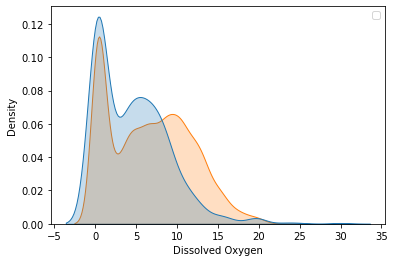

In [968]:
# Light
y_null = df[(df.Light.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)
y_non_null = df[(~df.Light.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)

data = pd.DataFrame({"Dissolved Oxygen": pd.concat([y_null, y_non_null], ignore_index=True),
                     "Type": ['Light Null'] * len(y_null) + ['Light Non Null'] * len(y_non_null)})


plt.figure()
sns.kdeplot(data=data, x="Dissolved Oxygen", hue="Type", common_norm=False, shade=True)
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Density')
#plt.xlim(0, max(data["Dissolved Oxygen"])) 
plt.legend()

plt.show()

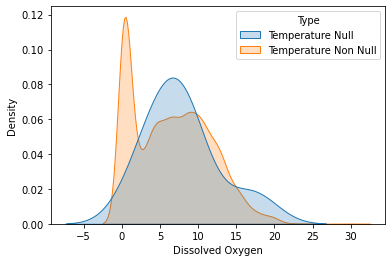

In [969]:
# Temperature
y_null = df[(df.Temperature.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)
y_non_null = df[(~df.Temperature.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)

data = pd.DataFrame({"Dissolved Oxygen": pd.concat([y_null, y_non_null], ignore_index=True),
                     "Type": ['Temperature Null'] * len(y_null) + ['Temperature Non Null'] * len(y_non_null)})

plt.figure()
sns.kdeplot(data=data, x="Dissolved Oxygen", hue="Type", common_norm=False, shade=True)
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Density')
#plt.xlim(0, max(data["Dissolved Oxygen"])) 
plt.show()

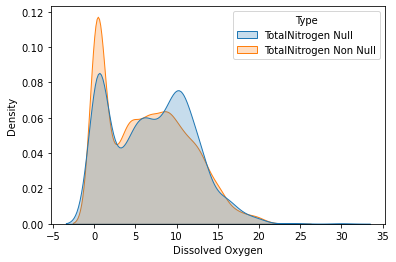

In [970]:
#TotalNitrogen
y_null = df[(df.TotalNitrogen.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)
y_non_null = df[(~df.TotalNitrogen.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)

data = pd.DataFrame({"Dissolved Oxygen": pd.concat([y_null, y_non_null], ignore_index=True),
                     "Type": ['TotalNitrogen Null'] * len(y_null) + ['TotalNitrogen Non Null'] * len(y_non_null)})

plt.figure()
sns.kdeplot(data=data, x="Dissolved Oxygen", hue="Type", common_norm=False, shade=True)
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Density')
plt.show()

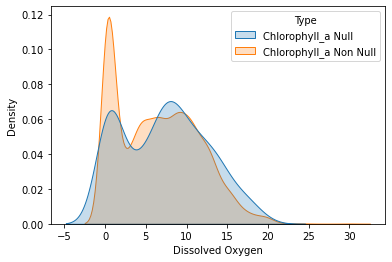

In [971]:
#Chlorophyll_a
y_null = df[(df.Chlorophyll_a.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)
y_non_null = df[(~df.Chlorophyll_a.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)

data = pd.DataFrame({"Dissolved Oxygen": pd.concat([y_null, y_non_null], ignore_index=True),
                     "Type": ['Chlorophyll_a Null'] * len(y_null) + ['Chlorophyll_a Non Null'] * len(y_non_null)})

plt.figure()
sns.kdeplot(data=data, x="Dissolved Oxygen", hue="Type", common_norm=False, shade=True)
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Density')
plt.show()

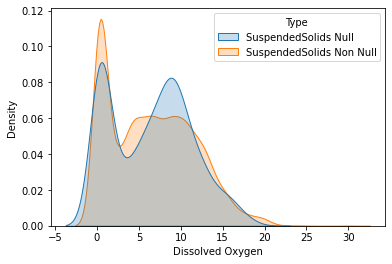

In [972]:
# SuspendedSolids
y_null = df[(df.SuspendedSolids.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)
y_non_null = df[(~df.SuspendedSolids.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)

data = pd.DataFrame({"Dissolved Oxygen": pd.concat([y_null, y_non_null], ignore_index=True),
                     "Type": ['SuspendedSolids Null'] * len(y_null) + ['SuspendedSolids Non Null'] * len(y_non_null)})

plt.figure()
sns.kdeplot(data=data, x="Dissolved Oxygen", hue="Type", common_norm=False, shade=True)
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Density')
plt.show()

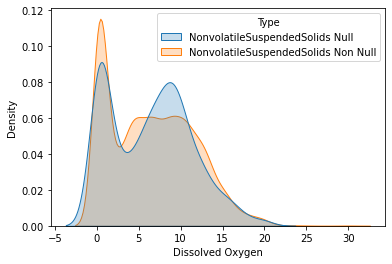

In [973]:
# NonvolatileSuspendedSolids
y_null = df[(df.NonvolatileSuspendedSolids.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)
y_non_null = df[(~df.NonvolatileSuspendedSolids.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)

data = pd.DataFrame({"Dissolved Oxygen": pd.concat([y_null, y_non_null], ignore_index=True),
                     "Type": ['NonvolatileSuspendedSolids Null'] * len(y_null) + ['NonvolatileSuspendedSolids Non Null'] * len(y_non_null)})

plt.figure()
sns.kdeplot(data=data, x="Dissolved Oxygen", hue="Type", common_norm=False, shade=True)
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Density')
plt.show()

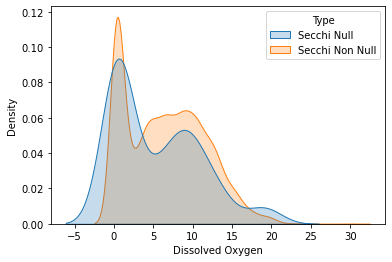

In [974]:
# Secchi
y_null = df[(df.Secchi.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)
y_non_null = df[(~df.Secchi.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)

data = pd.DataFrame({"Dissolved Oxygen": pd.concat([y_null, y_non_null], ignore_index=True),
                     "Type": ['Secchi Null'] * len(y_null) + ['Secchi Non Null'] * len(y_non_null)})

plt.figure()
sns.kdeplot(data=data, x="Dissolved Oxygen", hue="Type", common_norm=False, shade=True)
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Density')
plt.show()

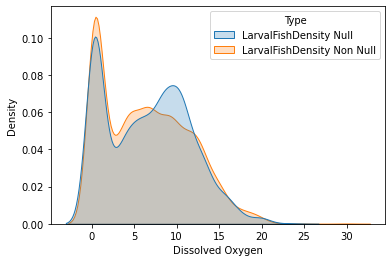

In [975]:
# LarvalFishDensity
y_null = df[(df.LarvalFishDensity.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)
y_non_null = df[(~df.LarvalFishDensity.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)

data = pd.DataFrame({"Dissolved Oxygen": pd.concat([y_null, y_non_null], ignore_index=True),
                     "Type": ['LarvalFishDensity Null'] * len(y_null) + ['LarvalFishDensity Non Null'] * len(y_non_null)})

plt.figure()
sns.kdeplot(data=data, x="Dissolved Oxygen", hue="Type", common_norm=False, shade=True)
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Density')
plt.show()

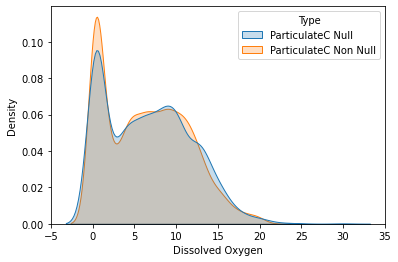

In [976]:
# ParticulateC
y_null = df[(df.ParticulateC.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)
y_non_null = df[(~df.ParticulateC.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)

data = pd.DataFrame({"Dissolved Oxygen": pd.concat([y_null, y_non_null], ignore_index=True),
                     "Type": ['ParticulateC Null'] * len(y_null) + ['ParticulateC Non Null'] * len(y_non_null)})

plt.figure()
sns.kdeplot(data=data, x="Dissolved Oxygen", hue="Type", common_norm=False, shade=True)
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Density')
plt.show()

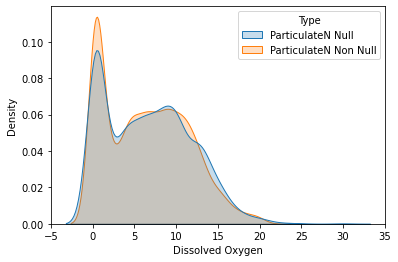

In [977]:
# ParticulateN
y_null = df[(df.ParticulateN.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)
y_non_null = df[(~df.ParticulateN.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)

data = pd.DataFrame({"Dissolved Oxygen": pd.concat([y_null, y_non_null], ignore_index=True),
                     "Type": ['ParticulateN Null'] * len(y_null) + ['ParticulateN Non Null'] * len(y_non_null)})

plt.figure()
sns.kdeplot(data=data, x="Dissolved Oxygen", hue="Type", common_norm=False, shade=True)
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Density')
plt.show()

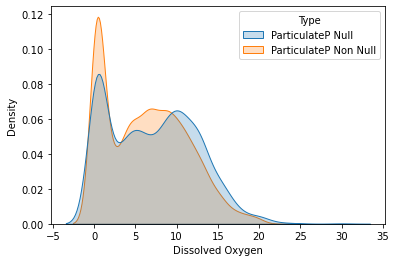

In [978]:
# ParticulateP
y_null = df[(df.ParticulateP.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)
y_non_null = df[(~df.ParticulateP.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)

data = pd.DataFrame({"Dissolved Oxygen": pd.concat([y_null, y_non_null], ignore_index=True),
                     "Type": ['ParticulateP Null'] * len(y_null) + ['ParticulateP Non Null'] * len(y_non_null)})

plt.figure()
sns.kdeplot(data=data, x="Dissolved Oxygen", hue="Type", common_norm=False, shade=True)
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Density')
plt.show()

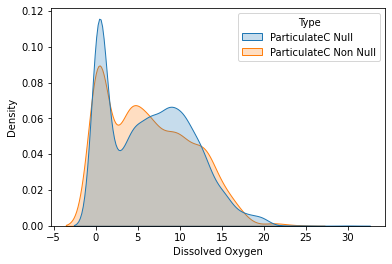

In [979]:
# IntegratedSamplingDepth
y_null = df[(df.IntegratedSamplingDepth.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)
y_non_null = df[(~df.IntegratedSamplingDepth.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)

data = pd.DataFrame({"Dissolved Oxygen": pd.concat([y_null, y_non_null], ignore_index=True),
                     "Type": ['ParticulateC Null'] * len(y_null) + ['ParticulateC Non Null'] * len(y_non_null)})

plt.figure()
sns.kdeplot(data=data, x="Dissolved Oxygen", hue="Type", common_norm=False, shade=True)
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Density')
plt.show()

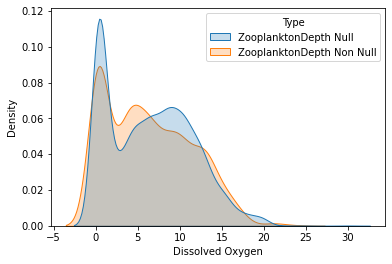

In [980]:
# ZooplanktonDepth
y_null = df[(df.ZooplanktonDepth.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)
y_non_null = df[(~df.ZooplanktonDepth.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)

data = pd.DataFrame({"Dissolved Oxygen": pd.concat([y_null, y_non_null], ignore_index=True),
                     "Type": ['ZooplanktonDepth Null'] * len(y_null) + ['ZooplanktonDepth Non Null'] * len(y_non_null)})

plt.figure()
sns.kdeplot(data=data, x="Dissolved Oxygen", hue="Type", common_norm=False, shade=True)
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Density')
plt.show()

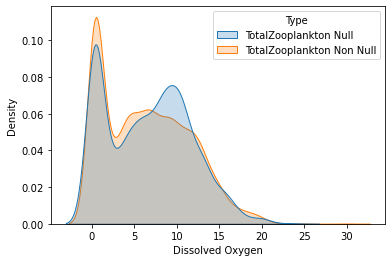

In [981]:
# TotalZooplankton
y_null = df[(df.TotalZooplankton.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)
y_non_null = df[(~df.TotalZooplankton.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)

data = pd.DataFrame({"Dissolved Oxygen": pd.concat([y_null, y_non_null], ignore_index=True),
                     "Type": ['TotalZooplankton Null'] * len(y_null) + ['TotalZooplankton Non Null'] * len(y_non_null)})

plt.figure()
sns.kdeplot(data=data, x="Dissolved Oxygen", hue="Type", common_norm=False, shade=True)
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Density')
plt.show()

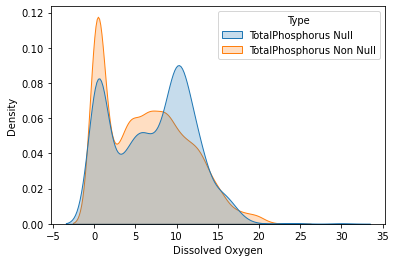

In [982]:
# TotalPhosphorus
y_null = df[(df.TotalPhosphorus.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)
y_non_null = df[(~df.TotalPhosphorus.isnull()) & (~df.DissolvedOxygen.isnull())]["DissolvedOxygen"].reset_index(drop=True)

data = pd.DataFrame({"Dissolved Oxygen": pd.concat([y_null, y_non_null], ignore_index=True),
                     "Type": ['TotalPhosphorus Null'] * len(y_null) + ['TotalPhosphorus Non Null'] * len(y_non_null)})

plt.figure()
sns.kdeplot(data=data, x="Dissolved Oxygen", hue="Type", common_norm=False, shade=True)
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Density')
plt.show()

From all above density plots for null and not null, we can see that the distribution for each does not have significantly difference. Therefore, we can easily remove the null or do some imputations. Since IntegratedSamplingDepth and ZooplanktonDepth have so many null values, we decide to remove these two features.

In [983]:
# Remove ZooplanktonDepth and IntegratedSamplingDepth columns from df
df = df.drop(columns=['ZooplanktonDepth', 'IntegratedSamplingDepth'], axis = 1)
df.head()

,Depth,DissolvedOxygen,Light,Temperature,Secchi,LarvalFishDensity,Chlorophyll_a,SuspendedSolids,NonvolatileSuspendedSolids,ParticulateC,ParticulateN,ParticulateP,TotalNitrogen,TotalPhosphorus,TotalZooplankton,year,DissolvedOxygen_dummy
0,0.0,16.8,1710.00,18.2,0.78,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,1992,1
2,1.0,16.2,214.30,18.0,0.78,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,1992,1
3,2.0,12.5,31.34,17.5,0.78,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,1992,1
4,3.0,7.2,6.07,16.1,0.78,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,1992,1
5,4.0,5.3,1.24,15.8,0.78,NaN,38.75,NaN,NaN,4787.0,683.0,42.44,NaN,NaN,NaN,1992,1


# Fill in Missing Values with Mean by Year

In [984]:
df_copy = df.copy()

In [985]:
merged_df = df_copy.merge(df_filled[['year', 'DissolvedOxygen', 'Light', 'Temperature', 'Secchi', 'LarvalFishDensity',
                                      'Chlorophyll_a', 'SuspendedSolids', 'NonvolatileSuspendedSolids', 'ParticulateC', 'ParticulateN',
                                      'ParticulateP', 'TotalNitrogen', 'TotalPhosphorus', 'TotalZooplankton']], on='year', how='left')


In [986]:
merged_df

,Depth,DissolvedOxygen_x,Light_x,Temperature_x,Secchi_x,LarvalFishDensity_x,Chlorophyll_a_x,SuspendedSolids_x,NonvolatileSuspendedSolids_x,ParticulateC_x,...,LarvalFishDensity_y,Chlorophyll_a_y,SuspendedSolids_y,NonvolatileSuspendedSolids_y,ParticulateC_y,ParticulateN_y,ParticulateP_y,TotalNitrogen_y,TotalPhosphorus_y,TotalZooplankton_y
0,0.0,16.80,1710.00,18.2,0.78,NaN,38.75,NaN,NaN,4787.0,...,5.955526,47.325512,14.274829,5.526556,3606.153285,612.854015,49.515401,4336.888778,99.16326,83.939589
1,1.0,16.20,214.30,18.0,0.78,NaN,38.75,NaN,NaN,4787.0,...,5.955526,47.325512,14.274829,5.526556,3606.153285,612.854015,49.515401,4336.888778,99.16326,83.939589
2,2.0,12.50,31.34,17.5,0.78,NaN,38.75,NaN,NaN,4787.0,...,5.955526,47.325512,14.274829,5.526556,3606.153285,612.854015,49.515401,4336.888778,99.16326,83.939589
3,3.0,7.20,6.07,16.1,0.78,NaN,38.75,NaN,NaN,4787.0,...,5.955526,47.325512,14.274829,5.526556,3606.153285,612.854015,49.515401,4336.888778,99.16326,83.939589
4,4.0,5.30,1.24,15.8,0.78,NaN,38.75,NaN,NaN,4787.0,...,5.955526,47.325512,14.274829,5.526556,3606.153285,612.854015,49.515401,4336.888778,99.16326,83.939589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7793,4.5,5.67,0.07,18.9,0.75,NaN,33.70,11.17,6.94,NaN,...,5.955526,46.281979,11.486310,4.757086,3642.087867,612.945923,72.085195,3014.849572,99.16326,83.939589
7794,5.0,5.40,NaN,18.8,0.75,NaN,33.70,11.17,6.94,NaN,...,5.955526,46.281979,11.486310,4.757086,3642.087867,612.945923,72.085195,3014.849572,99.16326,83.939589
7795,6.0,4.62,NaN,18.7,0.75,NaN,33.70,11.17,6.94,NaN,...,5.955526,46.281979,11.486310,4.757086,3642.087867,612.945923,72.085195,3014.849572,99.16326,83.939589
7796,7.0,3.87,NaN,18.6,0.75,NaN,33.70,11.17,6.94,NaN,...,5.955526,46.281979,11.486310,4.757086,3642.087867,612.945923,72.085195,3014.849572,99.16326,83.939589


In [987]:
merged_df['DissolvedOxygen_x'].fillna(merged_df['DissolvedOxygen_y'], inplace=True)
merged_df['Light_x'].fillna(merged_df['Light_y'], inplace=True)
merged_df['Temperature_x'].fillna(merged_df['Temperature_y'], inplace=True)
merged_df['Secchi_x'].fillna(merged_df['Secchi_y'], inplace=True)
merged_df['LarvalFishDensity_x'].fillna(merged_df['LarvalFishDensity_y'], inplace=True)
merged_df['Chlorophyll_a_x'].fillna(merged_df['Chlorophyll_a_y'], inplace=True)
merged_df['SuspendedSolids_x'].fillna(merged_df['SuspendedSolids_y'], inplace=True)
merged_df['NonvolatileSuspendedSolids_x'].fillna(merged_df['NonvolatileSuspendedSolids_y'], inplace=True)
merged_df['ParticulateC_x'].fillna(merged_df['ParticulateC_y'], inplace=True)
merged_df['ParticulateN_x'].fillna(merged_df['ParticulateN_y'], inplace=True)
merged_df['ParticulateP_x'].fillna(merged_df['ParticulateP_y'], inplace=True)
merged_df['TotalNitrogen_x'].fillna(merged_df['TotalNitrogen_y'], inplace=True)
merged_df['TotalPhosphorus_x'].fillna(merged_df['TotalPhosphorus_y'], inplace=True)
merged_df['TotalZooplankton_x'].fillna(merged_df['TotalZooplankton_y'], inplace=True)

In [988]:
merged_df

,Depth,DissolvedOxygen_x,Light_x,Temperature_x,Secchi_x,LarvalFishDensity_x,Chlorophyll_a_x,SuspendedSolids_x,NonvolatileSuspendedSolids_x,ParticulateC_x,...,LarvalFishDensity_y,Chlorophyll_a_y,SuspendedSolids_y,NonvolatileSuspendedSolids_y,ParticulateC_y,ParticulateN_y,ParticulateP_y,TotalNitrogen_y,TotalPhosphorus_y,TotalZooplankton_y
0,0.0,16.80,1710.000000,18.2,0.78,5.955526,38.75,14.274829,5.526556,4787.000000,...,5.955526,47.325512,14.274829,5.526556,3606.153285,612.854015,49.515401,4336.888778,99.16326,83.939589
1,1.0,16.20,214.300000,18.0,0.78,5.955526,38.75,14.274829,5.526556,4787.000000,...,5.955526,47.325512,14.274829,5.526556,3606.153285,612.854015,49.515401,4336.888778,99.16326,83.939589
2,2.0,12.50,31.340000,17.5,0.78,5.955526,38.75,14.274829,5.526556,4787.000000,...,5.955526,47.325512,14.274829,5.526556,3606.153285,612.854015,49.515401,4336.888778,99.16326,83.939589
3,3.0,7.20,6.070000,16.1,0.78,5.955526,38.75,14.274829,5.526556,4787.000000,...,5.955526,47.325512,14.274829,5.526556,3606.153285,612.854015,49.515401,4336.888778,99.16326,83.939589
4,4.0,5.30,1.240000,15.8,0.78,5.955526,38.75,14.274829,5.526556,4787.000000,...,5.955526,47.325512,14.274829,5.526556,3606.153285,612.854015,49.515401,4336.888778,99.16326,83.939589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7793,4.5,5.67,0.070000,18.9,0.75,5.955526,33.70,11.170000,6.940000,3642.087867,...,5.955526,46.281979,11.486310,4.757086,3642.087867,612.945923,72.085195,3014.849572,99.16326,83.939589
7794,5.0,5.40,96.443844,18.8,0.75,5.955526,33.70,11.170000,6.940000,3642.087867,...,5.955526,46.281979,11.486310,4.757086,3642.087867,612.945923,72.085195,3014.849572,99.16326,83.939589
7795,6.0,4.62,96.443844,18.7,0.75,5.955526,33.70,11.170000,6.940000,3642.087867,...,5.955526,46.281979,11.486310,4.757086,3642.087867,612.945923,72.085195,3014.849572,99.16326,83.939589
7796,7.0,3.87,96.443844,18.6,0.75,5.955526,33.70,11.170000,6.940000,3642.087867,...,5.955526,46.281979,11.486310,4.757086,3642.087867,612.945923,72.085195,3014.849572,99.16326,83.939589


In [989]:
merged_df.drop(['DissolvedOxygen_y', 'Light_y', 'Temperature_y', 'Secchi_y', 'LarvalFishDensity_y', 'Chlorophyll_a_y',
                 'SuspendedSolids_y', 'NonvolatileSuspendedSolids_y', 'ParticulateC_y', 'ParticulateN_y', 'ParticulateP_y',
                 'TotalNitrogen_y', 'TotalPhosphorus_y', 'TotalZooplankton_y'], axis=1, inplace=True)

In [990]:
merged_df

,Depth,DissolvedOxygen_x,Light_x,Temperature_x,Secchi_x,LarvalFishDensity_x,Chlorophyll_a_x,SuspendedSolids_x,NonvolatileSuspendedSolids_x,ParticulateC_x,ParticulateN_x,ParticulateP_x,TotalNitrogen_x,TotalPhosphorus_x,TotalZooplankton_x,year,DissolvedOxygen_dummy
0,0.0,16.80,1710.000000,18.2,0.78,5.955526,38.75,14.274829,5.526556,4787.000000,683.000000,42.440000,4336.888778,99.16326,83.939589,1992,1
1,1.0,16.20,214.300000,18.0,0.78,5.955526,38.75,14.274829,5.526556,4787.000000,683.000000,42.440000,4336.888778,99.16326,83.939589,1992,1
2,2.0,12.50,31.340000,17.5,0.78,5.955526,38.75,14.274829,5.526556,4787.000000,683.000000,42.440000,4336.888778,99.16326,83.939589,1992,1
3,3.0,7.20,6.070000,16.1,0.78,5.955526,38.75,14.274829,5.526556,4787.000000,683.000000,42.440000,4336.888778,99.16326,83.939589,1992,1
4,4.0,5.30,1.240000,15.8,0.78,5.955526,38.75,14.274829,5.526556,4787.000000,683.000000,42.440000,4336.888778,99.16326,83.939589,1992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7793,4.5,5.67,0.070000,18.9,0.75,5.955526,33.70,11.170000,6.940000,3642.087867,612.945923,72.085195,1620.550000,99.16326,83.939589,2016,1
7794,5.0,5.40,96.443844,18.8,0.75,5.955526,33.70,11.170000,6.940000,3642.087867,612.945923,72.085195,1620.550000,99.16326,83.939589,2016,1
7795,6.0,4.62,96.443844,18.7,0.75,5.955526,33.70,11.170000,6.940000,3642.087867,612.945923,72.085195,1620.550000,99.16326,83.939589,2016,0
7796,7.0,3.87,96.443844,18.6,0.75,5.955526,33.70,11.170000,6.940000,3642.087867,612.945923,72.085195,1620.550000,99.16326,83.939589,2016,0


In [991]:
merged_df.rename(columns=lambda x: x.replace('_x', ''), inplace=True)
merged_df = merged_df.drop('year', axis=1)


In [992]:
merged_df

,Depth,DissolvedOxygen,Light,Temperature,Secchi,LarvalFishDensity,Chlorophyll_a,SuspendedSolids,NonvolatileSuspendedSolids,ParticulateC,ParticulateN,ParticulateP,TotalNitrogen,TotalPhosphorus,TotalZooplankton,DissolvedOxygen_dummy
0,0.0,16.80,1710.000000,18.2,0.78,5.955526,38.75,14.274829,5.526556,4787.000000,683.000000,42.440000,4336.888778,99.16326,83.939589,1
1,1.0,16.20,214.300000,18.0,0.78,5.955526,38.75,14.274829,5.526556,4787.000000,683.000000,42.440000,4336.888778,99.16326,83.939589,1
2,2.0,12.50,31.340000,17.5,0.78,5.955526,38.75,14.274829,5.526556,4787.000000,683.000000,42.440000,4336.888778,99.16326,83.939589,1
3,3.0,7.20,6.070000,16.1,0.78,5.955526,38.75,14.274829,5.526556,4787.000000,683.000000,42.440000,4336.888778,99.16326,83.939589,1
4,4.0,5.30,1.240000,15.8,0.78,5.955526,38.75,14.274829,5.526556,4787.000000,683.000000,42.440000,4336.888778,99.16326,83.939589,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7793,4.5,5.67,0.070000,18.9,0.75,5.955526,33.70,11.170000,6.940000,3642.087867,612.945923,72.085195,1620.550000,99.16326,83.939589,1
7794,5.0,5.40,96.443844,18.8,0.75,5.955526,33.70,11.170000,6.940000,3642.087867,612.945923,72.085195,1620.550000,99.16326,83.939589,1
7795,6.0,4.62,96.443844,18.7,0.75,5.955526,33.70,11.170000,6.940000,3642.087867,612.945923,72.085195,1620.550000,99.16326,83.939589,0
7796,7.0,3.87,96.443844,18.6,0.75,5.955526,33.70,11.170000,6.940000,3642.087867,612.945923,72.085195,1620.550000,99.16326,83.939589,0


# Linearity Assumtion

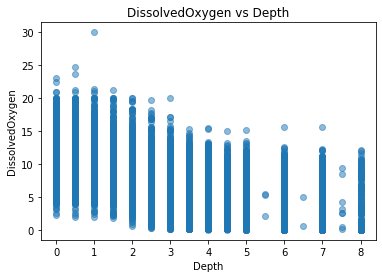

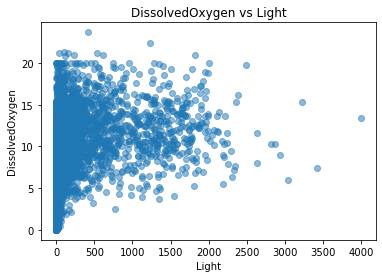

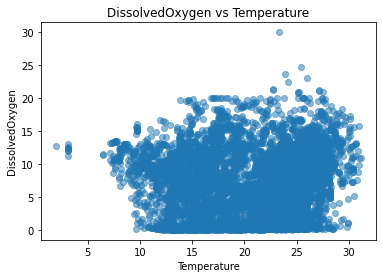

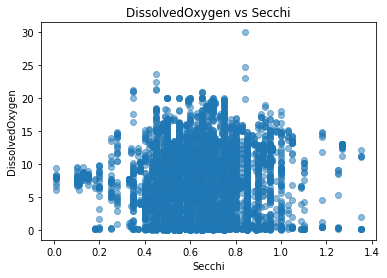

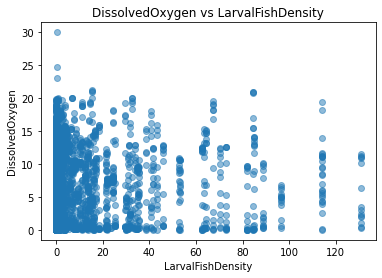

KeyError: 'IntegratedSamplingDepth'

<Figure size 432x288 with 0 Axes>

In [993]:
predictor_columns = ['Depth', 'Light', 'Temperature', 'Secchi', 'LarvalFishDensity',
                     'IntegratedSamplingDepth', 'Chlorophyll_a', 'SuspendedSolids',
                     'NonvolatileSuspendedSolids', 'ParticulateC', 'ParticulateN',
                     'ParticulateP', 'TotalNitrogen', 'TotalPhosphorus',
                     'ZooplanktonDepth', 'TotalZooplankton']

response_column = 'DissolvedOxygen'

# Assuming 'df' is your pandas DataFrame
for predictor in predictor_columns:
    plt.figure()
    plt.scatter(df[predictor], df[response_column], alpha=0.5)
    plt.xlabel(predictor)
    plt.ylabel(response_column)
    plt.title(f'{response_column} vs {predictor}')
    plt.show()


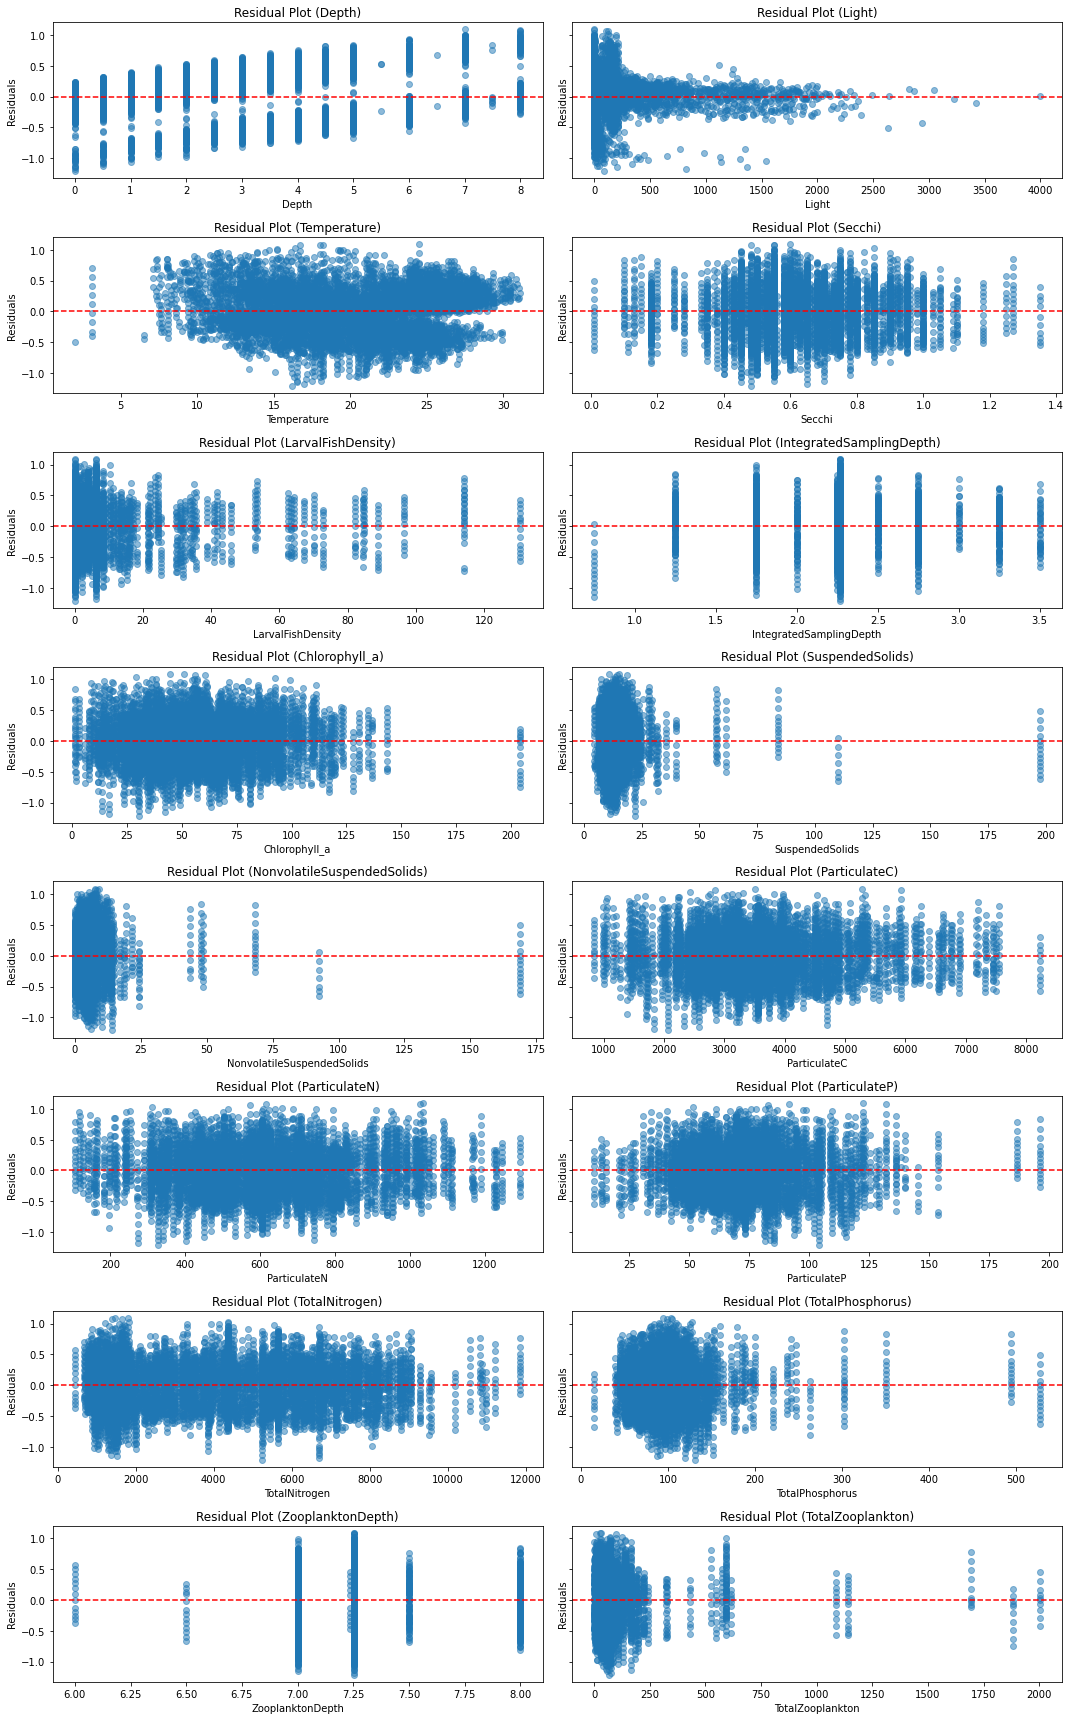

In [994]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
residuals = model.resid
predicted_values = model.predict()

# Plotting residual plots for each predictor variable
n_cols = 2
n_rows = (len(predictor_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows), sharey=True)
axes = axes.flatten()

for idx, col in enumerate(predictor_columns):
    axes[idx].scatter(X[col], residuals, alpha=0.5)
    axes[idx].axhline(y=0, color='r', linestyle='--')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Residuals')
    axes[idx].set_title(f'Residual Plot ({col})')

# remove extra subplots
for idx in range(len(predictor_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


If the residuals are randomly scattered around the horizontal line (y=0), it suggests that the linearity assumption holds.

# Correlation analysis

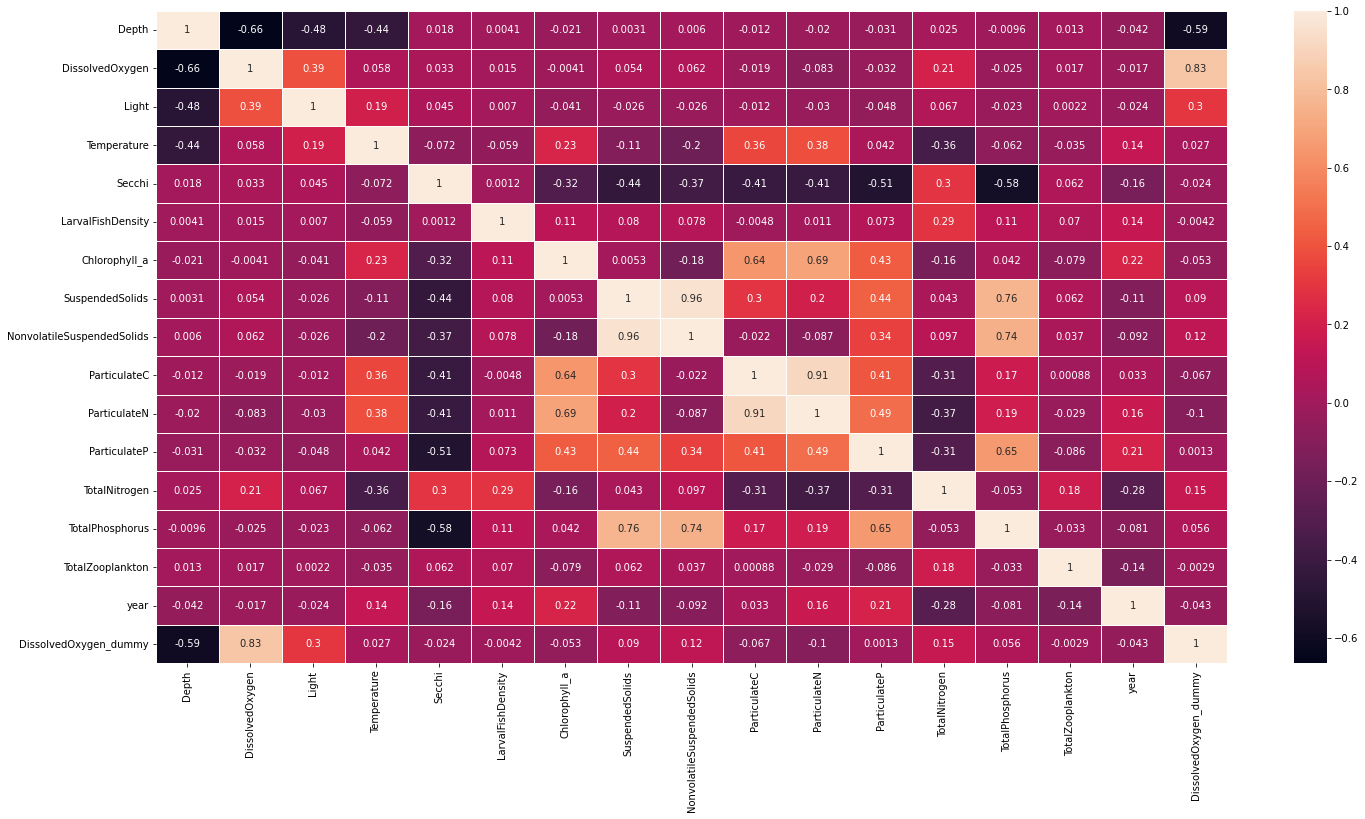

In [995]:
# Calculate the correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(24, 12))
sns.heatmap(corr_matrix, annot=True, linewidths=1, ax=ax)
plt.show()

From the plot, we can see only depth, light and totalNitrogen could have linear relationship with DissolvedOxygen

In [996]:
# calculate correlations
corr1 = df.corr(method='pearson')['DissolvedOxygen'][:]
corr1

Depth                        -0.664461
DissolvedOxygen               1.000000
Light                         0.390742
Temperature                   0.057852
Secchi                        0.032963
LarvalFishDensity             0.014610
Chlorophyll_a                -0.004124
SuspendedSolids               0.053516
NonvolatileSuspendedSolids    0.062225
ParticulateC                 -0.019207
ParticulateN                 -0.082908
ParticulateP                 -0.031691
TotalNitrogen                 0.211471
TotalPhosphorus              -0.024905
TotalZooplankton              0.016985
year                         -0.017362
DissolvedOxygen_dummy         0.834144
Name: DissolvedOxygen, dtype: float64

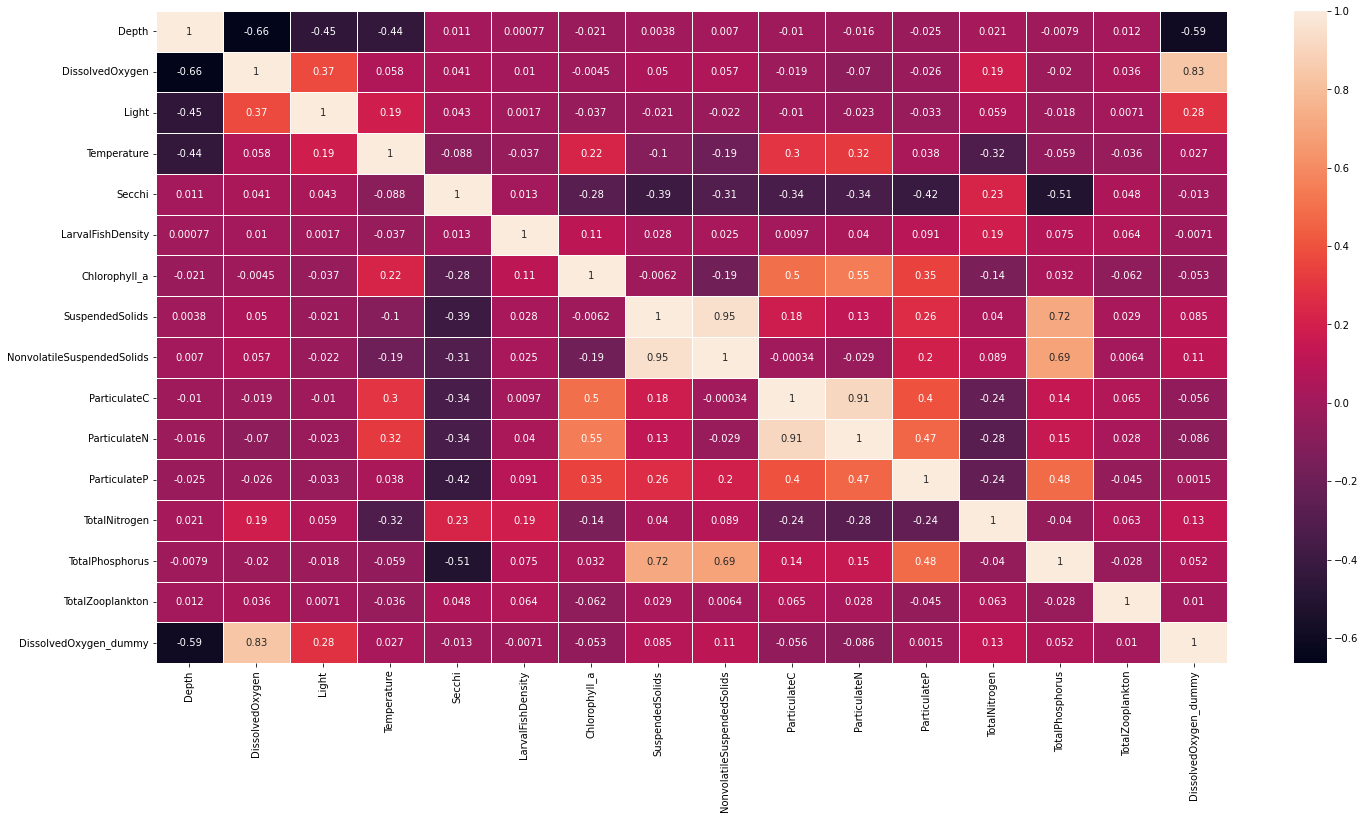

In [1014]:
# Calculate the correlation matrix
corr_matrix = merged_df.corr()
fig, ax = plt.subplots(figsize=(24, 12))
sns.heatmap(corr_matrix, annot=True, linewidths=1, ax=ax)
plt.show()

# OLS

In [997]:
#df_filled = df.fillna(df.mean())

df_filled1 = merged_df.copy()
X = df_filled1.drop(columns=['DissolvedOxygen'])
y = df_filled1['DissolvedOxygen']

# Add a constant (intercept)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

alpha = 0.05
# Extract the p-values from the model summary
p_values = model.summary2().tables[1]['P>|t|']

# Identify the features with p-values less than the significance level(alpha = 0.05)
selected_features = p_values[p_values < alpha].index.tolist()

if 'const' in selected_features:#remove constant
    selected_features.remove('const')


                            OLS Regression Results                            
Dep. Variable:        DissolvedOxygen   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1757.
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        14:10:06   Log-Likelihood:                -17854.
No. Observations:                7798   AIC:                         3.574e+04
Df Residuals:                    7782   BIC:                         3.585e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Feature Selection

# LASSO Regression

In [450]:
df.mean()

Depth                            3.372724
DissolvedOxygen                  6.485832
Light                          142.545418
Temperature                     20.096821
Secchi                           0.621847
LarvalFishDensity                6.239116
IntegratedSamplingDepth          2.268809
Chlorophyll_a                   56.960264
SuspendedSolids                 13.609787
NonvolatileSuspendedSolids       5.247618
ParticulateC                  3564.998315
ParticulateN                   605.686804
ParticulateP                    73.361444
TotalNitrogen                 4364.613557
TotalPhosphorus                 97.134488
ZooplanktonDepth                 7.255544
TotalZooplankton                71.294214
DissolvedOxygen_dummy            0.577712
dtype: float64

In [998]:
df_filled2 = merged_df.copy()
 
X = df_filled2.drop(columns=['DissolvedOxygen', 'DissolvedOxygen_dummy'])
y = df_filled2['DissolvedOxygen_dummy']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create a LassoCV model
lasso_cv = LassoCV(cv=5, random_state=42)

lasso_cv.fit(X_train, y_train)

coefs = lasso_cv.coef_

# Extract the selected features
selected_features = np.where(coefs != 0)[0]
selected_feature_names = X.columns[selected_features]

print("Selected features using Lasso method:")
print(selected_feature_names)
print(coefs)
print(len(selected_feature_names))
print(len(coefs))

Selected features using Lasso method:
Index(['Depth', 'Light', 'Temperature', 'Secchi', 'LarvalFishDensity',
       'SuspendedSolids', 'NonvolatileSuspendedSolids', 'ParticulateC',
       'ParticulateN', 'ParticulateP', 'TotalNitrogen', 'TotalPhosphorus',
       'TotalZooplankton'],
      dtype='object')
[-1.18057102  0.0589992  -0.7477475  -0.06792378 -0.04557205 -0.
 -0.00397536  0.49672681  0.48616626 -0.4007955   0.03194604  0.14588673
 -0.09113572 -0.02201594]
13
14


# Tree-based: SelectFromModel

In [999]:
df_filled3 = merged_df.copy()

X = df_filled3.drop(columns=['DissolvedOxygen','DissolvedOxygen_dummy'])
y = df_filled3['DissolvedOxygen_dummy']

# Choose 6 top features 
num_feats = 14

# Create a random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X, y)

# Get the feature importances
importances = rf_regressor.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]#reverse the sorted indices

# Select top 6 features
selected_features = X.columns[sorted_indices[:num_feats]]
   
print("Selected features using Tree-based method:")
print(selected_features)

Selected features using Tree-based method:
Index(['Depth', 'Temperature', 'Light', 'TotalNitrogen',
       'NonvolatileSuspendedSolids', 'Chlorophyll_a', 'TotalZooplankton',
       'SuspendedSolids', 'ParticulateP', 'TotalPhosphorus', 'ParticulateC',
       'ParticulateN', 'Secchi', 'LarvalFishDensity'],
      dtype='object')


Selected Features with Different Methods:

Tree:
'Depth', 'Temperature', 'Light', 'TotalNitrogen','NonvolatileSuspendedSolids', 'Chlorophyll_a', 'TotalZooplankton', 'SuspendedSolids', 'ParticulateP', 'TotalPhosphorus', 'Secchi','ParticulateC', 'ParticulateN', 'LarvalFishDensity'

Lasso:
'Depth', 'Light', 'Temperature', 'Secchi', 'LarvalFishDensity','SuspendedSolids', 'NonvolatileSuspendedSolids', 'ParticulateC', 'ParticulateN', 'ParticulateP', 'TotalNitrogen', 'TotalPhosphorus', 'TotalZooplankton'

# First Selected Features (Lasso)

In [1001]:
# create a dataframe containing only the selected predictor columns and the target variable 
predictor_columns = ['Depth', 'Light', 'Temperature', 'Secchi', 'LarvalFishDensity','SuspendedSolids', 'NonvolatileSuspendedSolids', 'ParticulateC', 'ParticulateN', 'ParticulateP', 'TotalNitrogen', 'TotalPhosphorus', 'TotalZooplankton']

X = merged_df[predictor_columns]
y = merged_df['DissolvedOxygen_dummy']

df_subset = pd.concat([X, y], axis=1)
display(df_subset)

,Depth,Light,Temperature,Secchi,LarvalFishDensity,SuspendedSolids,NonvolatileSuspendedSolids,ParticulateC,ParticulateN,ParticulateP,TotalNitrogen,TotalPhosphorus,TotalZooplankton,DissolvedOxygen_dummy
0,0.0,1710.000000,18.2,0.78,5.955526,14.274829,5.526556,4787.000000,683.000000,42.440000,4336.888778,99.16326,83.939589,1
1,1.0,214.300000,18.0,0.78,5.955526,14.274829,5.526556,4787.000000,683.000000,42.440000,4336.888778,99.16326,83.939589,1
2,2.0,31.340000,17.5,0.78,5.955526,14.274829,5.526556,4787.000000,683.000000,42.440000,4336.888778,99.16326,83.939589,1
3,3.0,6.070000,16.1,0.78,5.955526,14.274829,5.526556,4787.000000,683.000000,42.440000,4336.888778,99.16326,83.939589,1
4,4.0,1.240000,15.8,0.78,5.955526,14.274829,5.526556,4787.000000,683.000000,42.440000,4336.888778,99.16326,83.939589,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7793,4.5,0.070000,18.9,0.75,5.955526,11.170000,6.940000,3642.087867,612.945923,72.085195,1620.550000,99.16326,83.939589,1
7794,5.0,96.443844,18.8,0.75,5.955526,11.170000,6.940000,3642.087867,612.945923,72.085195,1620.550000,99.16326,83.939589,1
7795,6.0,96.443844,18.7,0.75,5.955526,11.170000,6.940000,3642.087867,612.945923,72.085195,1620.550000,99.16326,83.939589,0
7796,7.0,96.443844,18.6,0.75,5.955526,11.170000,6.940000,3642.087867,612.945923,72.085195,1620.550000,99.16326,83.939589,0


In [1002]:
# remove all missing values
df_clean = df_subset.dropna().reset_index(drop=True)
display(df_clean)

,Depth,Light,Temperature,Secchi,LarvalFishDensity,SuspendedSolids,NonvolatileSuspendedSolids,ParticulateC,ParticulateN,ParticulateP,TotalNitrogen,TotalPhosphorus,TotalZooplankton,DissolvedOxygen_dummy
0,0.0,1710.000000,18.2,0.78,5.955526,14.274829,5.526556,4787.000000,683.000000,42.440000,4336.888778,99.16326,83.939589,1
1,1.0,214.300000,18.0,0.78,5.955526,14.274829,5.526556,4787.000000,683.000000,42.440000,4336.888778,99.16326,83.939589,1
2,2.0,31.340000,17.5,0.78,5.955526,14.274829,5.526556,4787.000000,683.000000,42.440000,4336.888778,99.16326,83.939589,1
3,3.0,6.070000,16.1,0.78,5.955526,14.274829,5.526556,4787.000000,683.000000,42.440000,4336.888778,99.16326,83.939589,1
4,4.0,1.240000,15.8,0.78,5.955526,14.274829,5.526556,4787.000000,683.000000,42.440000,4336.888778,99.16326,83.939589,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7793,4.5,0.070000,18.9,0.75,5.955526,11.170000,6.940000,3642.087867,612.945923,72.085195,1620.550000,99.16326,83.939589,1
7794,5.0,96.443844,18.8,0.75,5.955526,11.170000,6.940000,3642.087867,612.945923,72.085195,1620.550000,99.16326,83.939589,1
7795,6.0,96.443844,18.7,0.75,5.955526,11.170000,6.940000,3642.087867,612.945923,72.085195,1620.550000,99.16326,83.939589,0
7796,7.0,96.443844,18.6,0.75,5.955526,11.170000,6.940000,3642.087867,612.945923,72.085195,1620.550000,99.16326,83.939589,0


In [1003]:
#seperate response and features
X = df_clean[predictor_columns]
y = df_clean['DissolvedOxygen_dummy']
print(X.shape)
print(y.shape)

(7798, 13)
(7798,)


In [1004]:
# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

# Logistic Regression

/Users/maheze/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


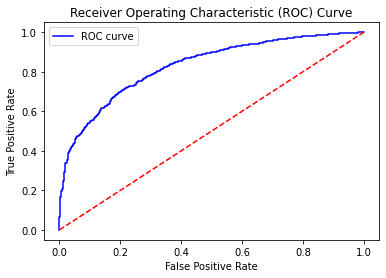

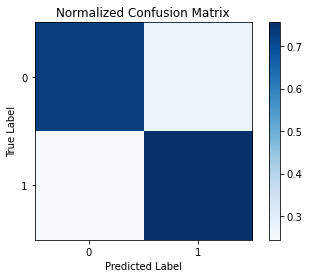

Logistic Regression Accuracy Score: 0.7452991452991453
AUC-ROC Score: 0.828906247645568
Confusion Matrix:
[[ 705  261]
 [ 335 1039]]
Normalized Confusion Matrix:
[[0.72981366 0.27018634]
 [0.24381368 0.75618632]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       966
           1       0.80      0.76      0.78      1374

    accuracy                           0.75      2340
   macro avg       0.74      0.74      0.74      2340
weighted avg       0.75      0.75      0.75      2340



In [1009]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_reg_preds = log_reg.predict(X_test)
log_reg_proba = log_reg.predict_proba(X_test)[:, 1]  # probabilities for the positive class

log_reg_accuracy = accuracy_score(y_test, log_reg_preds)
log_reg_conf_matrix1 = confusion_matrix(y_test, log_reg_preds)
log_reg_conf_matrix = confusion_matrix(y_test, log_reg_preds, normalize='true')
log_reg_class_report = classification_report(y_test, log_reg_preds)
log_reg_auc_roc = roc_auc_score(y_test, log_reg_proba)

fpr, tpr, thresholds = roc_curve(y_test, log_reg_proba)

plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Create a normalized confusion matrix plot
plt.imshow(log_reg_conf_matrix, cmap='Blues')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

print(f"Logistic Regression Accuracy Score: {log_reg_accuracy}")
print(f"AUC-ROC Score: {log_reg_auc_roc}")
print(f"Confusion Matrix:\n{log_reg_conf_matrix1}")
print(f"Normalized Confusion Matrix:\n{log_reg_conf_matrix}")
print(f"Classification Report: \n{log_reg_class_report}")


# Random Forest

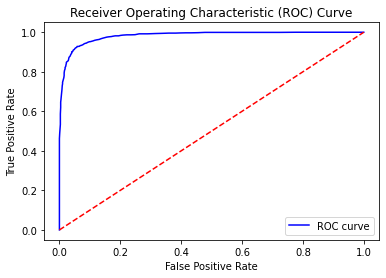

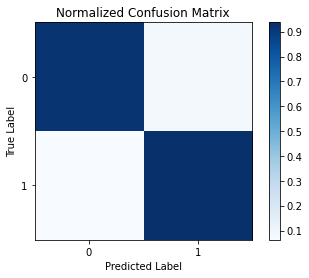

Accuracy Score of Random Forest: 0.9311965811965812
AUC-ROC Score: 0.9822961777584902
Confusion Matrix:
[[ 891   75]
 [  86 1288]]
Normalized Confusion Matrix:
[[0.92236025 0.07763975]
 [0.06259098 0.93740902]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       966
           1       0.94      0.94      0.94      1374

    accuracy                           0.93      2340
   macro avg       0.93      0.93      0.93      2340
weighted avg       0.93      0.93      0.93      2340



In [1010]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)

random_forest_predictions = random_forest_classifier.predict(X_test)
random_forest_proba = random_forest_classifier.predict_proba(X_test)[:, 1]  # probabilities for the positive class

random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_confusion_matrix1 = confusion_matrix(y_test, random_forest_predictions)
random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_predictions, normalize='true')
random_forest_classification_report = classification_report(y_test, random_forest_predictions)
random_forest_auc_roc = roc_auc_score(y_test, random_forest_proba)

fpr, tpr, thresholds = roc_curve(y_test, random_forest_proba)

plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Create a normalized confusion matrix plot
plt.imshow(random_forest_confusion_matrix, cmap='Blues')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

print(f"Accuracy Score of Random Forest: {random_forest_accuracy}")
print(f"AUC-ROC Score: {random_forest_auc_roc}")
print(f"Confusion Matrix:\n{random_forest_confusion_matrix1}")
print(f"Normalized Confusion Matrix:\n{random_forest_confusion_matrix}")
print(f"Classification Report:\n{random_forest_classification_report}")


# XgBoost

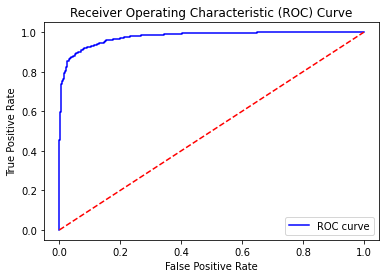

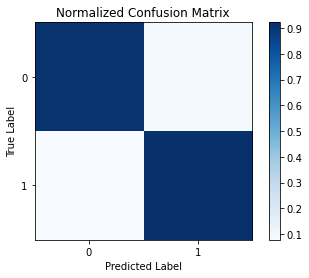

Accuracy Score of XGBoost Classifier: 0.9175213675213675
AUC-ROC Score: 0.9768090325808192
Confusion Matrix:
[[ 880   86]
 [ 107 1267]]
Normalized Confusion Matrix:
[[0.91097308 0.08902692]
 [0.07787482 0.92212518]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       966
           1       0.94      0.92      0.93      1374

    accuracy                           0.92      2340
   macro avg       0.91      0.92      0.92      2340
weighted avg       0.92      0.92      0.92      2340



In [1011]:
xgb_classifier = XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=5, n_estimators=180)
xgb_classifier.fit(X_train, y_train)

xgb_predictions = xgb_classifier.predict(X_test)
xgb_proba = xgb_classifier.predict_proba(X_test)[:, 1]  # probabilities for the positive class

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_confusion_matrix1 = confusion_matrix(y_test, xgb_predictions)
xgb_confusion_matrix = confusion_matrix(y_test, xgb_predictions, normalize='true')
xgb_classification_report = classification_report(y_test, xgb_predictions)
xgb_auc_roc = roc_auc_score(y_test, xgb_proba)

fpr, tpr, thresholds = roc_curve(y_test, xgb_proba)

plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Create a normalized confusion matrix plot
plt.imshow(xgb_confusion_matrix, cmap='Blues')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

print(f"Accuracy Score of XGBoost Classifier: {xgb_accuracy}")
print(f"AUC-ROC Score: {xgb_auc_roc}")
print(f"Confusion Matrix:\n{xgb_confusion_matrix1}")
print(f"Normalized Confusion Matrix:\n{xgb_confusion_matrix}")
print(f"Classification Report:\n{xgb_classification_report}")


# SVM

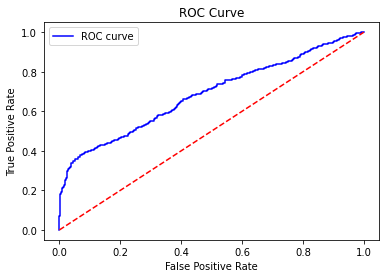

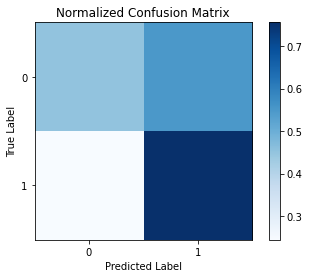

Accuracy Score of SVM Classifier: 0.6299145299145299
AUC-ROC Score: 0.6856445191835357
Confusion Matrix:
[[ 435  531]
 [ 335 1039]]
Normalized Confusion Matrix:
[[0.45031056 0.54968944]
 [0.24381368 0.75618632]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.45      0.50       966
           1       0.66      0.76      0.71      1374

    accuracy                           0.63      2340
   macro avg       0.61      0.60      0.60      2340
weighted avg       0.62      0.63      0.62      2340



In [1012]:
svm_classifier = SVC(kernel='rbf', C=1, random_state=42)
svm_classifier.fit(X_train, y_train)

svm_predictions = svm_classifier.predict(X_test)

# Compute decision function values for the test data
svm_decision_values = svm_classifier.decision_function(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

svm_confusion_matrix1 = confusion_matrix(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions, normalize='true')
svm_classification_report = classification_report(y_test, svm_predictions)
svm_auc_roc = roc_auc_score(y_test, svm_decision_values)

fpr, tpr, thresholds = roc_curve(y_test, svm_decision_values)

plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Create a normalized confusion matrix plot
plt.imshow(svm_confusion_matrix, cmap='Blues')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

print(f"Accuracy Score of SVM Classifier: {svm_accuracy}")
print(f"AUC-ROC Score: {svm_auc_roc}")
print(f"Confusion Matrix:\n{svm_confusion_matrix1}")
print(f"Normalized Confusion Matrix:\n{svm_confusion_matrix}")
print(f"Classification Report:\n{svm_classification_report}")


# Second Selected Features (Tree)

In [1024]:
# create a dataframe containing only the selected predictor columns and the target variable 
predictor_columns1 = ['Depth', 'Temperature', 'Light', 'TotalNitrogen','NonvolatileSuspendedSolids', 'Chlorophyll_a', 'TotalZooplankton', 'SuspendedSolids', 'ParticulateP', 'TotalPhosphorus', 'Secchi','ParticulateC', 'ParticulateN', 'LarvalFishDensity']

X = merged_df[predictor_columns1]
y = merged_df['DissolvedOxygen_dummy']

df_subset = pd.concat([X, y], axis=1)
display(df_subset)

,Depth,Temperature,Light,TotalNitrogen,NonvolatileSuspendedSolids,Chlorophyll_a,TotalZooplankton,SuspendedSolids,ParticulateP,TotalPhosphorus,Secchi,ParticulateC,ParticulateN,LarvalFishDensity,DissolvedOxygen_dummy
0,0.0,18.2,1710.000000,4336.888778,5.526556,38.75,83.939589,14.274829,42.440000,99.16326,0.78,4787.000000,683.000000,5.955526,1
1,1.0,18.0,214.300000,4336.888778,5.526556,38.75,83.939589,14.274829,42.440000,99.16326,0.78,4787.000000,683.000000,5.955526,1
2,2.0,17.5,31.340000,4336.888778,5.526556,38.75,83.939589,14.274829,42.440000,99.16326,0.78,4787.000000,683.000000,5.955526,1
3,3.0,16.1,6.070000,4336.888778,5.526556,38.75,83.939589,14.274829,42.440000,99.16326,0.78,4787.000000,683.000000,5.955526,1
4,4.0,15.8,1.240000,4336.888778,5.526556,38.75,83.939589,14.274829,42.440000,99.16326,0.78,4787.000000,683.000000,5.955526,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7793,4.5,18.9,0.070000,1620.550000,6.940000,33.70,83.939589,11.170000,72.085195,99.16326,0.75,3642.087867,612.945923,5.955526,1
7794,5.0,18.8,96.443844,1620.550000,6.940000,33.70,83.939589,11.170000,72.085195,99.16326,0.75,3642.087867,612.945923,5.955526,1
7795,6.0,18.7,96.443844,1620.550000,6.940000,33.70,83.939589,11.170000,72.085195,99.16326,0.75,3642.087867,612.945923,5.955526,0
7796,7.0,18.6,96.443844,1620.550000,6.940000,33.70,83.939589,11.170000,72.085195,99.16326,0.75,3642.087867,612.945923,5.955526,0


In [1025]:
df_clean = df_subset.dropna().reset_index(drop=True)
display(df_clean)

,Depth,Temperature,Light,TotalNitrogen,NonvolatileSuspendedSolids,Chlorophyll_a,TotalZooplankton,SuspendedSolids,ParticulateP,TotalPhosphorus,Secchi,ParticulateC,ParticulateN,LarvalFishDensity,DissolvedOxygen_dummy
0,0.0,18.2,1710.000000,4336.888778,5.526556,38.75,83.939589,14.274829,42.440000,99.16326,0.78,4787.000000,683.000000,5.955526,1
1,1.0,18.0,214.300000,4336.888778,5.526556,38.75,83.939589,14.274829,42.440000,99.16326,0.78,4787.000000,683.000000,5.955526,1
2,2.0,17.5,31.340000,4336.888778,5.526556,38.75,83.939589,14.274829,42.440000,99.16326,0.78,4787.000000,683.000000,5.955526,1
3,3.0,16.1,6.070000,4336.888778,5.526556,38.75,83.939589,14.274829,42.440000,99.16326,0.78,4787.000000,683.000000,5.955526,1
4,4.0,15.8,1.240000,4336.888778,5.526556,38.75,83.939589,14.274829,42.440000,99.16326,0.78,4787.000000,683.000000,5.955526,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7793,4.5,18.9,0.070000,1620.550000,6.940000,33.70,83.939589,11.170000,72.085195,99.16326,0.75,3642.087867,612.945923,5.955526,1
7794,5.0,18.8,96.443844,1620.550000,6.940000,33.70,83.939589,11.170000,72.085195,99.16326,0.75,3642.087867,612.945923,5.955526,1
7795,6.0,18.7,96.443844,1620.550000,6.940000,33.70,83.939589,11.170000,72.085195,99.16326,0.75,3642.087867,612.945923,5.955526,0
7796,7.0,18.6,96.443844,1620.550000,6.940000,33.70,83.939589,11.170000,72.085195,99.16326,0.75,3642.087867,612.945923,5.955526,0


In [1026]:
X = df_clean[predictor_columns1]
y = df_clean['DissolvedOxygen_dummy']
print(X.shape)
print(y.shape)

(7798, 14)
(7798,)


In [1027]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

# Logistic Regression

/Users/maheze/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


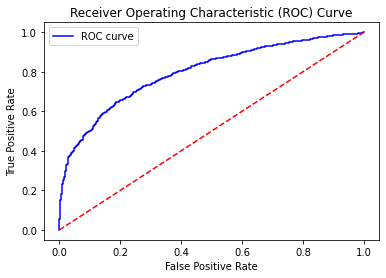

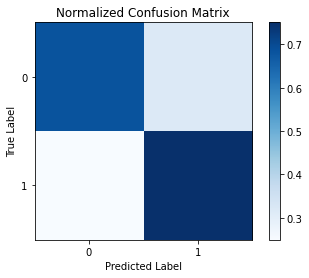

Logistic Regression Accuracy Score: 0.7222222222222222
AUC-ROC Score: 0.7981345864769187
Confusion Matrix:
[[ 661  308]
 [ 342 1029]]
Normalized Confusion Matrix:
[[0.68214654 0.31785346]
 [0.24945295 0.75054705]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       969
           1       0.77      0.75      0.76      1371

    accuracy                           0.72      2340
   macro avg       0.71      0.72      0.72      2340
weighted avg       0.72      0.72      0.72      2340



In [1028]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_reg_preds = log_reg.predict(X_test)
log_reg_proba = log_reg.predict_proba(X_test)[:, 1]  # probabilities for the positive class

log_reg_accuracy = accuracy_score(y_test, log_reg_preds)
log_reg_conf_matrix1 = confusion_matrix(y_test, log_reg_preds)
log_reg_conf_matrix = confusion_matrix(y_test, log_reg_preds, normalize='true')
log_reg_class_report = classification_report(y_test, log_reg_preds)
log_reg_auc_roc = roc_auc_score(y_test, log_reg_proba)

fpr, tpr, thresholds = roc_curve(y_test, log_reg_proba)

plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Create a normalized confusion matrix plot
plt.imshow(log_reg_conf_matrix, cmap='Blues')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

print(f"Logistic Regression Accuracy Score: {log_reg_accuracy}")
print(f"AUC-ROC Score: {log_reg_auc_roc}")
print(f"Confusion Matrix:\n{log_reg_conf_matrix1}")
print(f"Normalized Confusion Matrix:\n{log_reg_conf_matrix}")
print(f"Classification Report: \n{log_reg_class_report}")


# Random Forest

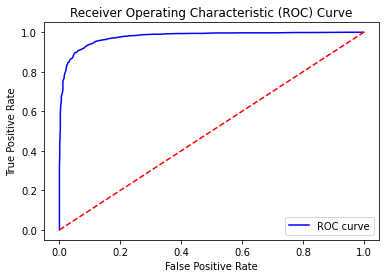

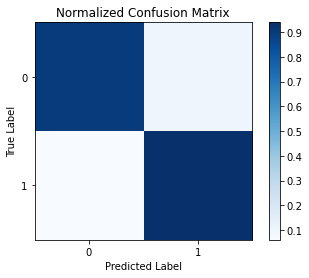

Accuracy Score of Random Forest: 0.9230769230769231
AUC-ROC Score: 0.9772773634003488
Confusion Matrix:
[[ 873   96]
 [  84 1287]]
Normalized Confusion Matrix:
[[0.90092879 0.09907121]
 [0.06126915 0.93873085]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       969
           1       0.93      0.94      0.93      1371

    accuracy                           0.92      2340
   macro avg       0.92      0.92      0.92      2340
weighted avg       0.92      0.92      0.92      2340



In [1029]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)

random_forest_predictions = random_forest_classifier.predict(X_test)
random_forest_proba = random_forest_classifier.predict_proba(X_test)[:, 1]  # probabilities for the positive class

random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_confusion_matrix1 = confusion_matrix(y_test, random_forest_predictions)
random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_predictions, normalize='true')
random_forest_classification_report = classification_report(y_test, random_forest_predictions)
random_forest_auc_roc = roc_auc_score(y_test, random_forest_proba)

fpr, tpr, thresholds = roc_curve(y_test, random_forest_proba)

plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Create a normalized confusion matrix plot
plt.imshow(random_forest_confusion_matrix, cmap='Blues')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

print(f"Accuracy Score of Random Forest: {random_forest_accuracy}")
print(f"AUC-ROC Score: {random_forest_auc_roc}")
print(f"Confusion Matrix:\n{random_forest_confusion_matrix1}")
print(f"Normalized Confusion Matrix:\n{random_forest_confusion_matrix}")
print(f"Classification Report:\n{random_forest_classification_report}")


# XGboost

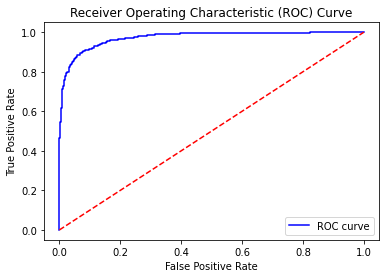

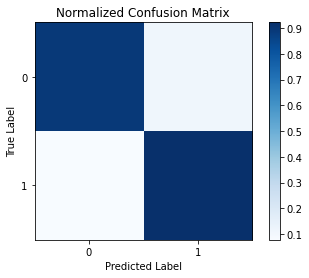

Accuracy Score of XGBoost Classifier: 0.9094017094017094
AUC-ROC Score: 0.9733360732676501
Confusion Matrix:
[[ 864  105]
 [ 107 1264]]
Normalized Confusion Matrix:
[[0.89164087 0.10835913]
 [0.07804522 0.92195478]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       969
           1       0.92      0.92      0.92      1371

    accuracy                           0.91      2340
   macro avg       0.91      0.91      0.91      2340
weighted avg       0.91      0.91      0.91      2340



In [1030]:
xgb_classifier = XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=5, n_estimators=180)
xgb_classifier.fit(X_train, y_train)

xgb_predictions = xgb_classifier.predict(X_test)
xgb_proba = xgb_classifier.predict_proba(X_test)[:, 1]  # probabilities for the positive class

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_confusion_matrix1 = confusion_matrix(y_test, xgb_predictions)
xgb_confusion_matrix = confusion_matrix(y_test, xgb_predictions, normalize='true')
xgb_classification_report = classification_report(y_test, xgb_predictions)
xgb_auc_roc = roc_auc_score(y_test, xgb_proba)

fpr, tpr, thresholds = roc_curve(y_test, xgb_proba)

plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Create a normalized confusion matrix plot
plt.imshow(xgb_confusion_matrix, cmap='Blues')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

print(f"Accuracy Score of XGBoost Classifier: {xgb_accuracy}")
print(f"AUC-ROC Score: {xgb_auc_roc}")
print(f"Confusion Matrix:\n{xgb_confusion_matrix1}")
print(f"Normalized Confusion Matrix:\n{xgb_confusion_matrix}")
print(f"Classification Report:\n{xgb_classification_report}")


# SVM

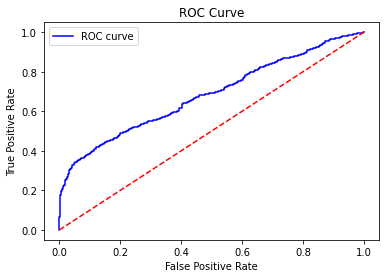

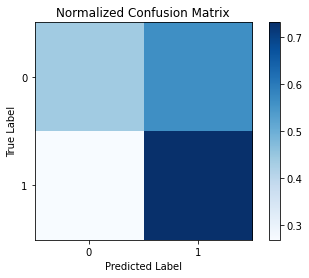

Accuracy Score of SVM Classifier: 0.6098290598290599
AUC-ROC Score: 0.6828616355751868
Confusion Matrix:
[[ 423  546]
 [ 367 1004]]
Normalized Confusion Matrix:
[[0.43653251 0.56346749]
 [0.26768782 0.73231218]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.44      0.48       969
           1       0.65      0.73      0.69      1371

    accuracy                           0.61      2340
   macro avg       0.59      0.58      0.58      2340
weighted avg       0.60      0.61      0.60      2340



In [1031]:
svm_classifier = SVC(kernel='rbf', C=1, random_state=42)
svm_classifier.fit(X_train, y_train)

svm_predictions = svm_classifier.predict(X_test)

# Compute decision function values for the test data
svm_decision_values = svm_classifier.decision_function(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

svm_confusion_matrix1 = confusion_matrix(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions, normalize='true')
svm_classification_report = classification_report(y_test, svm_predictions)
svm_auc_roc = roc_auc_score(y_test, svm_decision_values)

fpr, tpr, thresholds = roc_curve(y_test, svm_decision_values)

plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Create a normalized confusion matrix plot
plt.imshow(svm_confusion_matrix, cmap='Blues')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

print(f"Accuracy Score of SVM Classifier: {svm_accuracy}")
print(f"AUC-ROC Score: {svm_auc_roc}")
print(f"Confusion Matrix:\n{svm_confusion_matrix1}")
print(f"Normalized Confusion Matrix:\n{svm_confusion_matrix}")
print(f"Classification Report:\n{svm_classification_report}")
